In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import sys
import os

import warnings
warnings.filterwarnings('ignore')


#Función para sacar outliers
#(se puede cambiar eso de s-s.mean <= etc, esa es una forma posible de detectar outliers)

def mascara_outliers(s, mult):
    return abs(s - s.mean()) <= mult*s.std()

def sacar_outliers(datos,tag,mult):
    mascara = mascara_outliers(datos[tag], mult)
    return datos[mascara]


#Función para delimitar ejes:
#(dice dominio, pero se puede usar para imagen también... ya se que esta medio cabeza, pero anda bien)

def mascara_dominio_abajo(s,x0):
    return x0 <= s
def mascara_dominio_arriba(s,x1):
    return s <= x1

def achicar_dominio(datos,tag,x0,x1):
    mascara = mascara_dominio_abajo(datos[tag],x0)
    datos = datos[mascara]
    mascara = mascara_dominio_arriba(datos[tag],x1)
    return datos[mascara]


#Función para crear una columna con cada año
#(es imrpotante haber cargado el csv con el arguemtno parse_dates=[tag])
def crear_col_años(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month <= 12 else x.year + 1)


#Graficadores

def graficador(xs, ys1, ys2, title, labelX, labelY, interp, col1, col2, graf1, graf2):
    ax = sns.tsplot(data=ys1, time=xs, interpolate=interp, color=col1)
    ax = sns.tsplot(data=ys2, time=xs, interpolate=interp, color=col2)
    ax.legend(labels=[graf1,graf2])
    sns.plt.title(title)
    sns.plt.xlabel(labelX)
    sns.plt.ylabel(labelY)

def graficador3(data, tagX, tagY, title, labelX, labelY, interp, col, graf1, graf2, graf3):
    ax = sns.tsplot(data=data[tagY], time=data[tagX], interpolate=interp, color=col)
    ax.legend(labels=[graf1,graf2,graf3])
    sns.plt.title(title)
    sns.plt.xlabel(labelX)
    sns.plt.ylabel(labelY)
    
def mostrar():
    sns.plt.show()
    sns.plt.close()


#Auxiliares

def descripcion(datos):
    print(datos.describe())

def ver_filas(datos, fil):
    print(datos.head(fil))

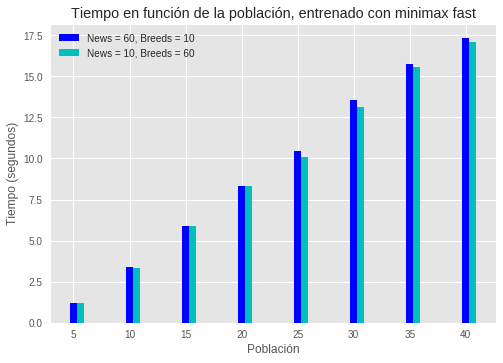

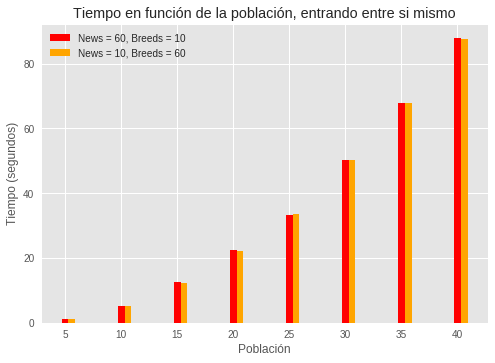

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


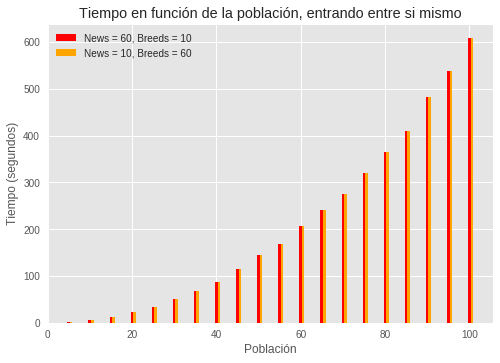

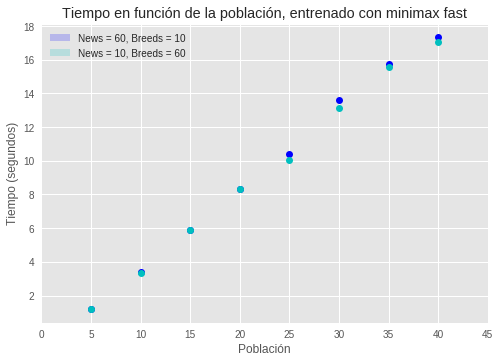

In [4]:
################################
# Levanto los datos, y los veo #
################################

def filtrado_tiempos(df, porc, pop_size, trainer, against):
    news = 60
    breeds = 10
    if(porc == "breeds"):
        news = 10
        breeds = 60
    return df.loc[(df['news_porc'] == news) & (df['breeds_porc'] == breeds) & (df['pop_size'] == pop_size) & (df['trainer'] == trainer) & (df['playerAgainst'] == against)]


def tiempos_de_trainer(df, trainer, against):
    res = []
    tn = []
    tb = []
    res.append(tn)
    res.append(tb)
    
    pops = [5,10,15,20,25,30,35,40]
    for i in range(0,len(pops)):
        df_news = filtrado_tiempos(df, "news", pops[i], trainer, against).reset_index()
        df_breeds = filtrado_tiempos(df, "breeds", pops[i], trainer, against).reset_index()
        
        time_news = 0.0
        time_breeds = 0.0
        for j in range(0,10):
            time_news = time_news + df_news['time'][j]
            time_breeds = time_breeds + df_breeds['time'][j]
            
        time_news = time_news/10
        time_breeds = time_breeds/10
        
        res[0].append(time_news)
        res[1].append(time_breeds)

    return res


def plotbar(xs,ys1, ys2,r,w,lgx,lgy,lx,ly,t,c1,c2):
    sns.plt.bar([xs[i] for i in range(0,r)],[ys1[j] for j in range(0,r)],width=w,color=c1)
    sns.plt.bar([xs[i]+w for i in range(0,r)],[ys2[j] for j in range(0,r)],width=w,color=c2)
    sns.plt.legend(labels=[lgx,lgy])
    sns.plt.title(t)
    sns.plt.xlabel(lx)
    sns.plt.ylabel(ly)
    sns.plt.show()
    sns.plt.close()

df_times = pd.read_csv('./gen_hel_time2.csv')


vs_random = []
vs_random.append(tiempos_de_trainer(df_times, 'minimax_fast', 'random'))
vs_random.append(tiempos_de_trainer(df_times, 'parametric_player', 'random'))
init = [5,10,15,20,25,30,35,40]


plotbar(init,vs_random[0][0], vs_random[0][1],8,0.6,'News = 60, Breeds = 10','News = 10, Breeds = 60','Población','Tiempo (segundos)','Tiempo en función de la población, entrenado con minimax fast','b','c')
plotbar(init,vs_random[1][0], vs_random[1][1],8,0.6,'News = 60, Breeds = 10','News = 10, Breeds = 60','Población','Tiempo (segundos)','Tiempo en función de la población, entrando entre si mismo','r','orange')


df_loco = pd.read_csv('./gen_loco.csv')
time_loco = []
for i in range(0,20):
    p = (i+1)*5
    df_ll =  df_loco.loc[(df_loco['news_porc'] == 10) & (df_loco['breeds_porc'] == 60) & (df_loco['pop_size'] == p) & (df_loco['trainer'] == 'parametric_player') & (df_loco['playerAgainst'] == 'fast_minimax')].reset_index()
    time_loco.append(df_ll['time'][0])
    
init_loco = []
for i in range(0,len(time_loco)):
    init_loco.append((i+1)*5)
print(init_loco)
plotbar(init_loco,time_loco, time_loco,20,0.6,'News = 60, Breeds = 10','News = 10, Breeds = 60','Población','Tiempo (segundos)','Tiempo en función de la población, entrando entre si mismo','r','orange')


#def graficador(xs, ys1, ys2, title, labelX, labelY, interp, col1, col2, graf1, graf2)
graficador(init, vs_random[0][0], vs_random[0][1], 'Tiempo en función de la población, entrenado con minimax fast','Población','Tiempo (segundos)', False,'b','c', 'News = 60, Breeds = 10','News = 10, Breeds = 60',)
mostrar()

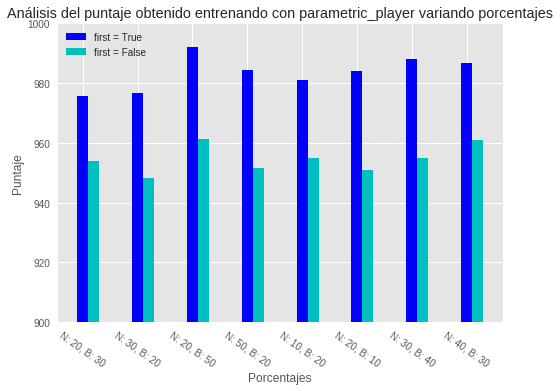

[(975.79999999999995, 987.70000000000005), (976.60000000000002, 987.79999999999995), (992.0, 996.0), (984.20000000000005, 992.10000000000002), (981.0, 990.5), (984.0, 991.89999999999998), (988.20000000000005, 994.0), (986.79999999999995, 993.39999999999998)]
[(953.79999999999995, 976.60000000000002), (948.20000000000005, 973.89999999999998), (961.39999999999998, 980.60000000000002), (951.60000000000002, 975.39999999999998), (955.0, 977.29999999999995), (951.0, 975.20000000000005), (954.79999999999995, 977.20000000000005), (960.79999999999995, 980.10000000000002)]


In [44]:
def filtrado_porcs(df, news,breeds,first):
    return df.loc[(df['news_porc'] == news) & (df['breeds_porc'] == breeds) & (df['first'] == first)].reset_index()

def puntajesRandom(df,news, breeds,first,salida):
    df_actual = filtrado_porcs(df,news,breeds,first)
    randomScore = 0
    randomWon = 0
    for j in range(0,len(df_actual['wonRandom'])):
        randomScore = randomScore + df_actual['scoreRandom'][j]
        randomWon = randomWon + df_actual['wonRandom'][j]
    randomScore = randomScore/10
    randomWon = randomWon/10
    salida.append((randomScore,randomWon))


df_porc_pp = pd.read_csv('./helix_porc_pp.csv')
df_porc_mf = pd.read_csv('./helix_porc_mf.csv')

pp_random_1 = []
pp_random_0 = []
pp_minimax_1 = []
df_mf = []

porcs = [(20,30),(20,50),(10,20),(30,40)]

for i in range(0,len(porcs)):
    puntajesRandom(df_porc_pp, porcs[i][0], porcs[i][1],True, pp_random_1)
    puntajesRandom(df_porc_pp, porcs[i][1], porcs[i][0],True, pp_random_1)
    puntajesRandom(df_porc_pp, porcs[i][0], porcs[i][1],False, pp_random_0)
    puntajesRandom(df_porc_pp, porcs[i][1], porcs[i][0],False, pp_random_0)


porcs3 = [(20,30),(30,20),(20,50),(50,20),(10,20),(20,10),(30,40),(40,30)]
porcs2 = ['N: 20, B: 30','N: 30, B: 20','N: 20, B: 50','N: 50, B: 20','N: 10, B: 20','N: 20, B: 10','N: 30, B: 40','N: 40, B: 30']
equises = []
for i in range(0,len(porcs2)):
    equises.append(i+1)


def plotbar2(xs,xt,ys1, ys2,r,w,lgx,lgy,lx,ly,t,c1,c2):
    sns.plt.bar([xs[i] for i in range(0,r)],[ys1[j] for j in range(0,r)],width=w,color=c1)
    sns.plt.bar([xs[i]+w for i in range(0,r)],[ys2[j] for j in range(0,r)],width=w,color=c2)
    sns.plt.xticks(xs, xt)
    sns.plt.xticks(rotation=-35)
    sns.plt.ylim(900,1000)
    sns.plt.legend(labels=[lgx,lgy])
    sns.plt.title(t)
    sns.plt.xlabel(lx)
    sns.plt.ylabel(ly)
    sns.plt.show()
    sns.plt.close()
    
    

plotbar2(equises,porcs2,[pp_random_1[i][0] for i in range(0,len(pp_random_1))],[pp_random_0[j][0] for j in range(0,len(pp_random_0))], len(equises),0.2,'first = True','first = False','Porcentajes','Puntaje','Análisis del puntaje obtenido entrenando con parametric_player variando porcentajes','b','c')

print(pp_random_1)
print(pp_random_0)

init_nuevo = []



#plotbar(init_nuevo, df_nuevo['won'], df_nuevo2['won'], 10, 0.6, 'c', 'c', 'c', 'c', 'c', 'b', 'c')

In [26]:

#graficador(xs, ys, title, labelX, labelY, interp, col, graf1, graf2)
df_tpp = df[df['trainer'] == 'parametric_player']
df_tpp_rnd = df_tpp[df_tpp['playerAgainst'] == 'random']

df_tpp_rnd_ts1 = df_tpp_rnd[df_tpp_rnd['typeScore'] == 1]
df_tpp_rnd_ts2 = df_tpp_rnd[df_tpp_rnd['typeScore'] == 2]
df_tpp_rnd_ts3 = df_tpp_rnd[df_tpp_rnd['typeScore'] == 3]
df_tpp_rnd_ts4 = df_tpp_rnd[df_tpp_rnd['typeScore'] == 4]
df_tpp_rnd[df_tpp_rnd['typeScore'] == 5]
#graficador()

,weight,trainer,playerAgainst,score,won,lost,tied,median_w_time,median_l_time,pop_size,news_porc,breeds_porc,typeScore,playerFirst,time
252,"{44,75,122,60,78,24,102,33,80,7,124,14,8,89}",parametric_player,random,249,996,4,0,4,10,20,10,20,5,True,11.9901
254,"{30,83,107,32,82,3,42,38,106,6,-4,107,5,90}",parametric_player,random,182,944,56,0,5,9,20,10,20,5,False,12.1623
256,"{14,116,11,78,-9,44,-23,111,106,32,66,117,-25,80}",parametric_player,random,250,1000,0,0,4,1,20,20,20,5,True,12.5218
258,"{90,107,32,4,100,68,-8,26,111,31,110,35,85,96}",parametric_player,random,187,967,33,0,5,5,20,20,20,5,False,12.8165
260,"{-25,-19,103,114,85,78,92,-15,115,7,24,122,60,87}",parametric_player,random,158,963,35,2,6,12,20,30,20,5,True,16.3772
262,"{64,-11,8,60,111,28,-24,107,113,68,88,85,-10,15}",parametric_player,random,123,915,85,0,7,11,20,30,20,5,False,15.5933
264,"{47,30,-14,33,14,-6,104,85,-21,19,76,-16,110,99}",parametric_player,random,166,996,4,0,6,13,20,50,20,5,True,22.5436
266,"{-7,34,99,79,71,31,112,63,5,80,-6,24,1,124}",parametric_player,random,187,959,40,1,5,9,20,50,20,5,False,22.7813
268,"{-10,95,19,-4,-4,74,70,68,68,2,93,32,41,-3}",parametric_player,random,248,993,7,0,4,10,20,30,10,5,True,14.3354
270,"{93,113,12,58,48,118,25,-20,63,113,75,7,19,79}",parametric_player,random,190,969,31,0,5,10,20,30,10,5,False,15.0597


In [29]:
################################
# Levanto los datos, y los veo #
################################

df_todos = []
df_nombres = []
for filename in sorted(os.listdir('./ejercicio2')):
    primero = True
    if not('ipynb' in filename) and not('aristas' in filename):
        df_nombres.append(filename)
        for res in os.listdir('./ejercicio2/'+str(filename)):
            df_actual = pd.read_csv('./ejercicio2/'+str(filename)+'/'+str(res))
            if primero:
                primero = False
                df_todos.append(df_actual)
            else:
                df_todos[-1]['prim'] = df_todos[-1]['prim'] + df_actual['prim']
                df_todos[-1]['master'] = df_todos[-1]['master'] + df_actual['master']

for i in range(0,len(df_todos)):
    df_todos[i]['prim'] = (df_todos[i]['prim'] / 250) #si se quiere reajustar la medida, hacerlo dentro de gráficos
    df_todos[i]['master'] = (df_todos[i]['master'] / 250)



In [3]:

    

df_todos_ej3 = []
df_nombres_ej3 = []
for filename in sorted(os.listdir('./ejercicio3')):
    primero = True
    if not('ipynb' in filename):
        df_nombres_ej3.append(filename)
        for res in os.listdir('./ejercicio3/'+str(filename)):
            df_actual = pd.read_csv('./ejercicio3/'+str(filename)+'/'+str(res))
            if primero:
                primero = False
                df_todos_ej3.append(df_actual)
            else:
                df_todos_ej3[-1]['tiempo'] = df_todos_ej3[-1]['tiempo'] + df_actual['tiempo']

for i in range(0,len(df_todos_ej3)):
    if i != 1:
        df_todos_ej3[i]['tiempo'] = (df_todos_ej3[i]['tiempo'] / 250) #si se quiere reajustar la medida, hacerlo dentro de gráficos

df_todos_ej3[1] = pd.read_csv('./ejercicio3/4590/1+100.csv')
    
df_comp = pd.read_csv('./columna20.csv')
df_todos_ej3[0] = df_todos_ej3[0].join(df_comp)
df_comp = pd.read_csv('./columna45.csv')
df_todos_ej3[1] = df_todos_ej3[1].join(df_comp)
df_comp = pd.read_csv('./columna90.csv')
df_todos_ej3[2] = df_todos_ej3[2].join(df_comp)

ver_filas(df_todos_ej3[4],10)

   fab  cli    tiempo
0   30   31  0.001314
1   30   32  0.001361
2   30   33  0.001412
3   30   34  0.001304
4   30   35  0.001356
5   30   36  0.001432
6   30   37  0.001479
7   30   38  0.001529
8   30   39  0.001602
9   30   40  0.001645


0 2090
1 4590
2 9090
3 fabs90
4 zcli90


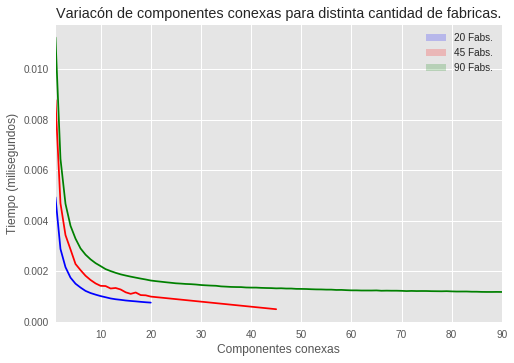

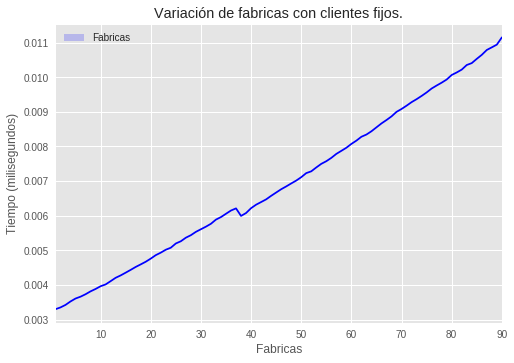

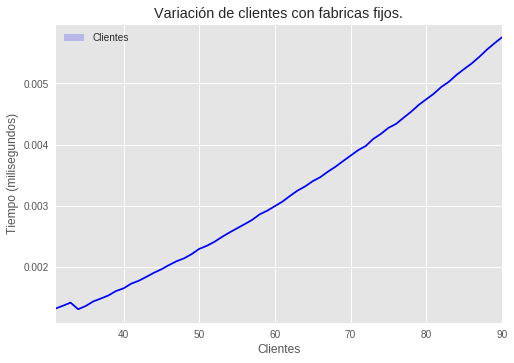

In [4]:
for i in range(0,len(df_nombres_ej3)):
    print(str(i) + ' ' + str(df_nombres_ej3[i]))
    
graficador3(df_todos_ej3[0], 'comp', 'tiempo', 'Variacón de componentes conexas para distinta cantidad de fabricas.', 'Componentes conexas', 'Tiempo (milisegundos)', True, 'b', '20 Fabs.', '45 Fabs.', '90 Fabs.')
graficador3(df_todos_ej3[1], 'comp', 'tiempo', 'Variacón de componentes conexas para distinta cantidad de fabricas.', 'Componentes conexas', 'Tiempo (milisegundos)', True, 'r', '20 Fabs.', '45 Fabs.', '90 Fabs.')
graficador3(df_todos_ej3[2], 'comp', 'tiempo', 'Variacón de componentes conexas para distinta cantidad de fabricas.', 'Componentes conexas', 'Tiempo (milisegundos)', True, 'g', '20 Fabs.', '45 Fabs.', '90 Fabs.')
mostrar()

graficador(df_todos_ej3[3], 'fab', 'tiempo', 'Variación de fabricas con clientes fijos.', 'Fabricas', 'Tiempo (milisegundos)', True, 'b', 'Fabricas', '')
mostrar()

graficador(df_todos_ej3[4], 'cli', 'tiempo', 'Variación de clientes con fabricas fijos.', 'Clientes', 'Tiempo (milisegundos)', True, 'b', 'Clientes', '')
mostrar()

0 primC_max
1 primC_med
2 primC_min
3 primO_max
4 primO_med
5 primO_min


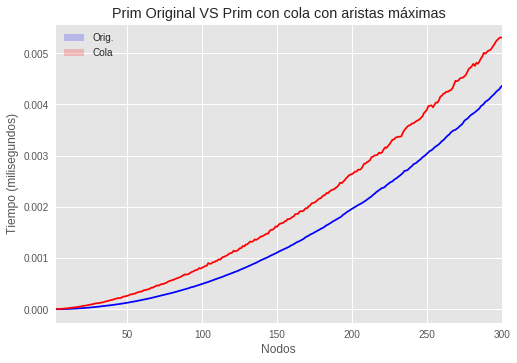

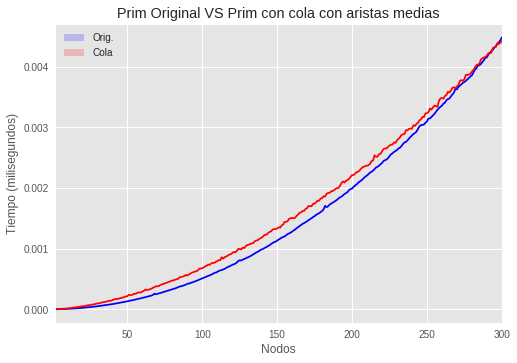

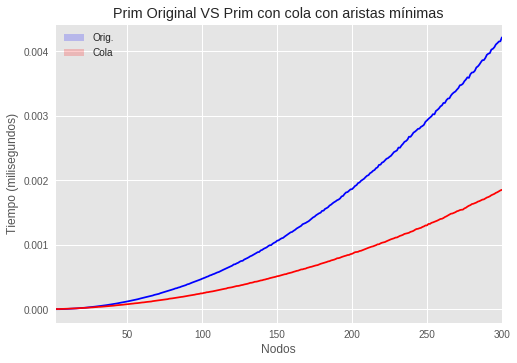

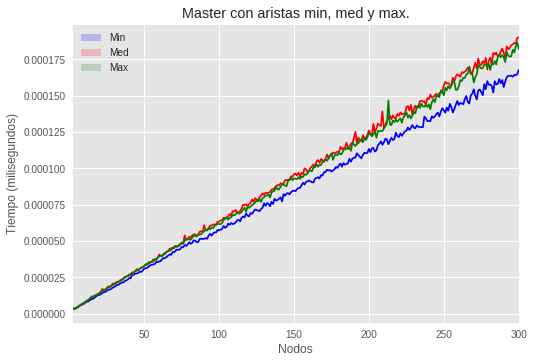

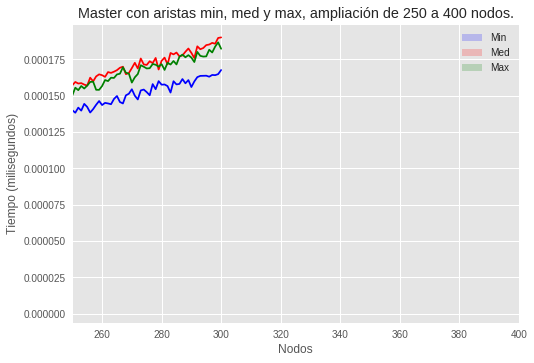

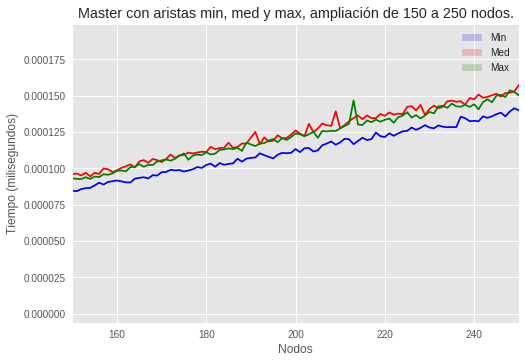

In [30]:

for i in range(0,len(df_nombres)):
    print(str(i) + ' ' + str(df_nombres[i]))
    
#####################
# Hago los gráficos #
#####################
#graficador(data, tagX, tagY, title, labelX, labelY, interp, col, graf1, graf2)


graficador(df_todos[3], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas máximas', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Orig.', 'Cola')
graficador(df_todos[0], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas máximas', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Orig.', 'Cola')
mostrar()

graficador(df_todos[4], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas medias', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Orig.', 'Cola')
graficador(df_todos[1], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas medias', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Orig.', 'Cola')
mostrar()

graficador(df_todos[5], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas mínimas', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Orig.', 'Cola')
graficador(df_todos[2], 'nodos', 'prim', 'Prim Original VS Prim con cola con aristas mínimas', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Orig.', 'Cola')
mostrar()



graficador3(df_todos[5], 'nodos', 'master', 'Master con aristas min, med y max.', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Min', 'Med', 'Max')
graficador3(df_todos[4], 'nodos', 'master', 'Master con aristas min, med y max.', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Min', 'Med', 'Max')
graficador3(df_todos[3], 'nodos', 'master', 'Master con aristas min, med y max.', 'Nodos', 'Tiempo (milisegundos)', True, 'g', 'Min', 'Med', 'Max')
mostrar()


graficador3(df_todos[5], 'nodos', 'master', 'Master con aristas min, med y max, ampliación de 250 a 400 nodos.', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Min', 'Med', 'Max')
graficador3(df_todos[4], 'nodos', 'master', 'Master con aristas min, med y max, ampliación de 250 a 400 nodos.', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Min', 'Med', 'Max')
graficador3(df_todos[3], 'nodos', 'master', 'Master con aristas min, med y max, ampliación de 250 a 400 nodos.', 'Nodos', 'Tiempo (milisegundos)', True, 'g', 'Min', 'Med', 'Max')
sns.plt.xlim(250,400)
mostrar()


graficador3(df_todos[5], 'nodos', 'master', 'Master con aristas min, med y max, ampliación de 150 a 250 nodos.', 'Nodos', 'Tiempo (milisegundos)', True, 'b', 'Min', 'Med', 'Max')
graficador3(df_todos[4], 'nodos', 'master', 'Master con aristas min, med y max, ampliación de 150 a 250 nodos.', 'Nodos', 'Tiempo (milisegundos)', True, 'r', 'Min', 'Med', 'Max')
graficador3(df_todos[3], 'nodos', 'master', 'Master con aristas min, med y max, ampliación de 150 a 250 nodos.', 'Nodos', 'Tiempo (milisegundos)', True, 'g', 'Min', 'Med', 'Max')
sns.plt.xlim(150,250)
mostrar()